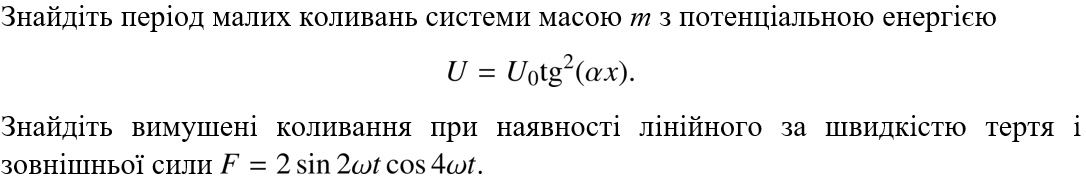

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [2]:
# Объявление переменных и функций

U_0 = var("U_0")
m,t = var("m,t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

Alpha = var("alpha")
alpha = function("alpha")(t)

In [3]:
# Кинетическая энергия в координатах x

Tx = (1/2) * m*((x.diff(t))^2)
disp(Tx)

<IPython.core.display.Math object>

In [4]:
# Потенциальная энергия в координатах x

U = U_0 * tan(alpha * x)^2

disp(U)

<IPython.core.display.Math object>

In [5]:
d2UdX2 = diff(U.subs(x == X), X, 2)
disp(d2UdX2)
disp(d2UdX2.subs(X == 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
# производная потенциальной энергии по координате
dUdX = diff(U.subs(x == X), X)
disp(dUdX)

<IPython.core.display.Math object>

In [46]:
# находим точку минимума потенциальной энергии
# приравнивая первую производную потенциальной энергии нулю

eq = dUdX.subs(alpha == Alpha) == 0
disp(eq)
disp(eq.lhs().operands())
# disp(solve (eq, X))
U_min = []
for operand in eq.lhs().operands():
    U_min += solve (operand == 0, X)
disp(U_min)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
# координата минимума потенциальной энергии
X_U_min = X.subs(U_min)
X_U_min

0

In [48]:
# Процедура линеаризации
# разложение потенциальной энергии в Ряд Тейлора до второго порядка
# относительно координаты минимума потенциальной энергии
U_tailor_2 = dUdX.subs(U_min) * (X - X_U_min)^1 / 1 \
           + d2UdX2.subs(U_min) * (X - X_U_min)^2 / 2
disp(U_tailor_2)

<IPython.core.display.Math object>

In [9]:
# Лагранжиан в Ряд Тейлора
L_tailor_2 = Tx - U_tailor_2
disp(L_tailor_2)

# в Лагранжиане производим замену производных обобщенных координат на v
L_tailor_2 = L_tailor_2.subs(x.diff(t) == V).subs(alpha == Alpha)
disp(L_tailor_2)

# Найдем обобщенные импульсы
P1_tailor_2 = L_tailor_2.diff(V).subs(V == v)
disp(P1_tailor_2)

# Найдем обобщенные силы
F1_tailor_2 = L_tailor_2.subs(x == X).diff(X).subs(X == x)
disp(F1_tailor_2)

# Запишем уравнения Эйлера-Лагранжа
de1_tailor_2 = P1_tailor_2.diff(t) - F1_tailor_2 == 0
disp(de1_tailor_2)

de1_tailor_2 = de1_tailor_2.substitute_function(v == x.diff(t))
disp(de1_tailor_2)

assume(U_0>0)
assume(Alpha>0)
assume(m>0)
sol_tailor_2 = desolve(de1_tailor_2, x, ivar=t, algorithm='maxima')
disp(sol_tailor_2)

sol_tailor_2_fricas = desolve(de1_tailor_2, x, ivar=t, algorithm='fricas')
disp(sol_tailor_2_fricas)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
sol_tailor_2

_K2*cos(sqrt(2)*sqrt(U_0)*alpha*t/sqrt(m)) + _K1*sin(sqrt(2)*sqrt(U_0)*alpha*t/sqrt(m))

In [11]:
omega_linearized = sol_tailor_2.operands()[0].operands()[1].operands()[0]/t
disp(omega_linearized)

<IPython.core.display.Math object>

In [12]:
T_linearized = 2*pi/(omega_linearized)
disp(T_linearized)

<IPython.core.display.Math object>

In [13]:
# вынуждающая сила
omega = var("omega")
F_external_ = 2 * sin(2 * omega * t) * cos(4 * omega * t)
disp(F_external_)

<IPython.core.display.Math object>

In [14]:
F_external = -sin(2 * omega * t) + sin(6 * omega * t)
disp(F_external)

<IPython.core.display.Math object>

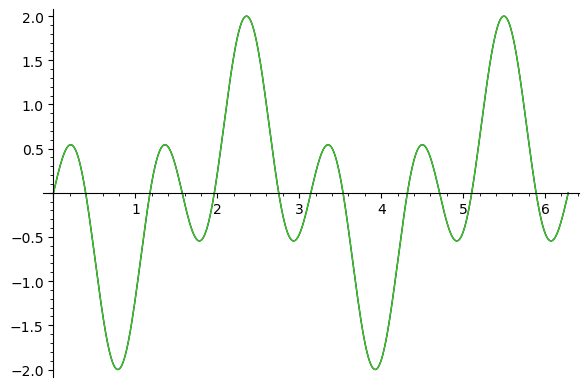

In [15]:
plot([F_external.subs(omega == 1),
     F_external_.subs(omega == 1)], t, 0, 2*pi)

In [16]:
F_external = F_external.expand()
disp(F_external)

<IPython.core.display.Math object>

In [17]:
# 
mu = var("mu")
assume (mu > 0)
F_friction = mu * v
disp(F_friction)

<IPython.core.display.Math object>

In [34]:
# Запишем уравнения Эйлера-Лагранжа с вынуждающей силой
de1_tailor_external_friction = P1_tailor_2.diff(t) - F1_tailor_2 == F_external - F_friction
de1_tailor_external_friction = de1_tailor_external_friction.substitute_function(v == x.diff(t))
disp(de1_tailor_external_friction)

<IPython.core.display.Math object>

In [35]:
# Запишем уравнения Эйлера-Лагранжа с вынуждающей силой
de1_tailor_external = P1_tailor_2.diff(t) - F1_tailor_2 == F_external
de1_tailor_external = de1_tailor_external.substitute_function(v == x.diff(t))
disp(de1_tailor_external)

<IPython.core.display.Math object>

In [36]:
# Запишем уравнения Эйлера-Лагранжа с friction
de1_tailor_friction = P1_tailor_2.diff(t) - F1_tailor_2 == - F_friction
de1_tailor_friction = de1_tailor_friction.substitute_function(v == x.diff(t))
disp(de1_tailor_friction)

<IPython.core.display.Math object>

In [37]:
sol_tailor_friction = desolve(de1_tailor_friction, x, ivar=t, algorithm='fricas')
disp(sol_tailor_friction)

<IPython.core.display.Math object>

In [38]:
assume(mu^2-8*U_0*Alpha^2*m<0)
sol_tailor_friction = desolve(de1_tailor_friction, x, ivar=t, algorithm='maxima')
disp(sol_tailor_friction)

<IPython.core.display.Math object>

In [42]:
sol_tailor_external = desolve(de1_tailor_external, x, ivar=t, algorithm='fricas')
disp(sol_tailor_external)
sol_tailor_external

<IPython.core.display.Math object>

_C0*e^(sqrt(2)*sqrt(-U_0*alpha^2/m)*t) + _C1*e^(-sqrt(2)*sqrt(-U_0*alpha^2/m)*t) - (U_0*alpha^2 - 10*m*omega^2 - 2*(U_0*alpha^2 - 2*m*omega^2)*cos(2*omega*t)^2)*sin(2*omega*t)/(U_0^2*alpha^4 - 20*U_0*alpha^2*m*omega^2 + 36*m^2*omega^4)

In [43]:
sol_tailor_external_friction = desolve(de1_tailor_external_friction, x, ivar=t, algorithm='fricas')
disp(sol_tailor_external_friction)
sol_tailor_external_friction

<IPython.core.display.Math object>

_C1*e^(-1/2*(m*t*sqrt(-(8*U_0*alpha^2*m - mu^2)/m^2) + mu*t)/m) + _C0*e^(1/2*(m*t*sqrt(-(8*U_0*alpha^2*m - mu^2)/m^2) - mu*t)/m) - (6*(U_0^2*alpha^4*mu*omega + 4*m^2*mu*omega^5 - (4*U_0*alpha^2*m*mu - mu^3)*omega^3)*cos(2*omega*t)^3 - (5*U_0^2*alpha^4*mu*omega + 180*m^2*mu*omega^5 - 9*(4*U_0*alpha^2*m*mu - mu^3)*omega^3)*cos(2*omega*t) + (U_0^3*alpha^6 - 360*m^3*omega^6 + 2*(118*U_0*alpha^2*m^2 - 9*m*mu^2)*omega^4 - 5*(6*U_0^2*alpha^4*m - U_0*alpha^2*mu^2)*omega^2 - 2*(U_0^3*alpha^6 - 72*m^3*omega^6 + 2*(38*U_0*alpha^2*m^2 - 9*m*mu^2)*omega^4 - (22*U_0^2*alpha^4*m - U_0*alpha^2*mu^2)*omega^2)*cos(2*omega*t)^2)*sin(2*omega*t))/(U_0^4*alpha^8 + 1296*m^4*omega^8 - 360*(4*U_0*alpha^2*m^3 - m^2*mu^2)*omega^6 + (472*U_0^2*alpha^4*m^2 - 72*U_0*alpha^2*m*mu^2 + 9*mu^4)*omega^4 - 10*(4*U_0^3*alpha^6*m - U_0^2*alpha^4*mu^2)*omega^2)

In [44]:
sol1_tailor_external_friction = desolve(de1_tailor_external_friction, x, ivar=t, algorithm='maxima', contrib_ode=True)
disp(sol1_tailor_external_friction)
sol1_tailor_external_friction

<IPython.core.display.Math object>

(_K2*cos(1/2*sqrt(8*U_0*alpha^2/m - mu^2/m^2)*t) + _K1*sin(1/2*sqrt(8*U_0*alpha^2/m - mu^2/m^2)*t))*e^(-1/2*mu*t/m) - 1/2*(3*(U_0^2*alpha^4*mu*omega + 4*m^2*mu*omega^5 - (4*U_0*alpha^2*m*mu - mu^3)*omega^3)*cos(6*omega*t) - (U_0^2*alpha^4*mu*omega + 324*m^2*mu*omega^5 - 9*(4*U_0*alpha^2*m*mu - mu^3)*omega^3)*cos(2*omega*t) - (U_0^3*alpha^6 - 72*m^3*omega^6 + 2*(38*U_0*alpha^2*m^2 - 9*m*mu^2)*omega^4 - (22*U_0^2*alpha^4*m - U_0*alpha^2*mu^2)*omega^2)*sin(6*omega*t) + (U_0^3*alpha^6 - 648*m^3*omega^6 + 18*(22*U_0*alpha^2*m^2 - m*mu^2)*omega^4 - (38*U_0^2*alpha^4*m - 9*U_0*alpha^2*mu^2)*omega^2)*sin(2*omega*t))/(U_0^4*alpha^8 + 1296*m^4*omega^8 - 360*(4*U_0*alpha^2*m^3 - m^2*mu^2)*omega^6 + (472*U_0^2*alpha^4*m^2 - 72*U_0*alpha^2*m*mu^2 + 9*mu^4)*omega^4 - 10*(4*U_0^3*alpha^6*m - U_0^2*alpha^4*mu^2)*omega^2)